In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
df1 = pd.read_csv('cleaned_df', index_col = 0)

In [137]:
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1


In [118]:
#df1["bathbed"] = df1["bathrooms"] * df1["bedrooms"]

In [119]:
dfdrop = df.drop('price',axis = 1)

In [120]:
dfdrop = dfdrop.drop('id', axis = 1)

In [121]:
dfdrop = dfdrop.drop('date', axis = 1)

In [122]:
X = dfdrop #want 2 dimensions of feature
y = df1['price']
#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [123]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [124]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

1982622.5755719673
[-1.97544175e+04  2.95967074e+04  6.34043688e+01  2.74891016e-01
  2.85780208e+04  3.13531765e+05  4.73036702e+04  2.80344723e+04
  9.26607240e+04  4.82002648e+01  3.72581307e+01 -2.25961148e+03
  2.39589265e+01 -4.48512700e+02  5.87661656e+05 -1.46169351e+05
  4.36643304e+01 -2.89155241e-01  0.00000000e+00]


In [125]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [126]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 152137.5017734621
Baseline Test score: 158521.0633586207


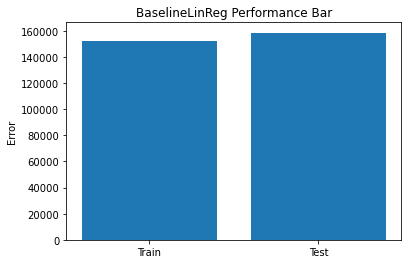

In [127]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('BaselineLinReg Performance Bar');

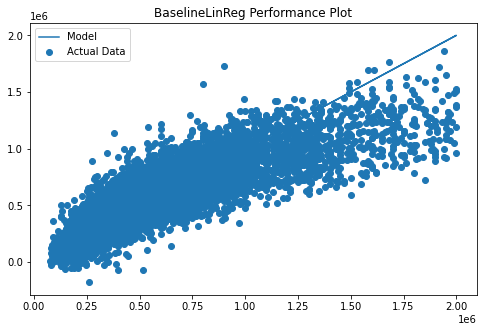

In [135]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('BaselineLinReg Performance Plot')
plt.legend();